# Main program

## Imports and global variables

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn import compose
import os
data_dir = "data/"

In [ ]:
df = pd.DataFrame(columns=["brand"])
for file in os.listdir(data_dir):
    partial_df = pd.read_csv(os.path.join(data_dir, file))
    if "tax(£)" in partial_df:
        partial_df.rename(columns={"tax(£)":"tax"}, inplace=True)
    partial_df["brand"] = file.split(".")[0]
    df = pd.concat([df, partial_df])

FileNotFoundError: ignored

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Observamos algunas anomalías:

*   Las columnas `tax` y `tax(£)`, que unificamos en el propio proceso de lectura) 
*   `year` superiores a 2020
*   `engineSize` con valor 0 (imposible)
*   `mpg` con mínimos y máximos imposibles (anomalías)



Llegados a este punto, y observados los datos y decidimos aplicar *One-Hot Encoder* a las clases (`brand`, `model`, `year`, `transmission`, `fuelType`), escalado de 1970 a 2020 a `year`

In [ ]:
one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
one_hot_encoder.fit(np.array(combined_df["year"]).reshape(-1,1))

#one_hot_encoder.transform(np.array(combined_df["year"]).reshape(-1,1)).toarray()

NameError: ignored

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("scale", sklearn.preprocessing.StandardScaler(), [0]),
    ("passthrough", "passthrough", [1]),
    ("scale", sklearn.preprocessing.StandardScaler(), [2]),
    ("min-max", sklearn.preprocessing.MinMaxScaler(), [3]),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(), [4])
]);

# Testing

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
df.brand.nunique() # should be 11

11

In [ ]:
df.fuelType.describe()

count     108540
unique         5
top       Petrol
freq       59875
Name: fuelType, dtype: object

In [ ]:
df.transmission.describe()

count     108540
unique         4
top       Manual
freq       61308
Name: transmission, dtype: object

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [ ]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [ ]:
print(sorted(df.year.unique())) # To detect

[1970.0, 1991.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2060.0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2291fb588>,
      dtype=object)

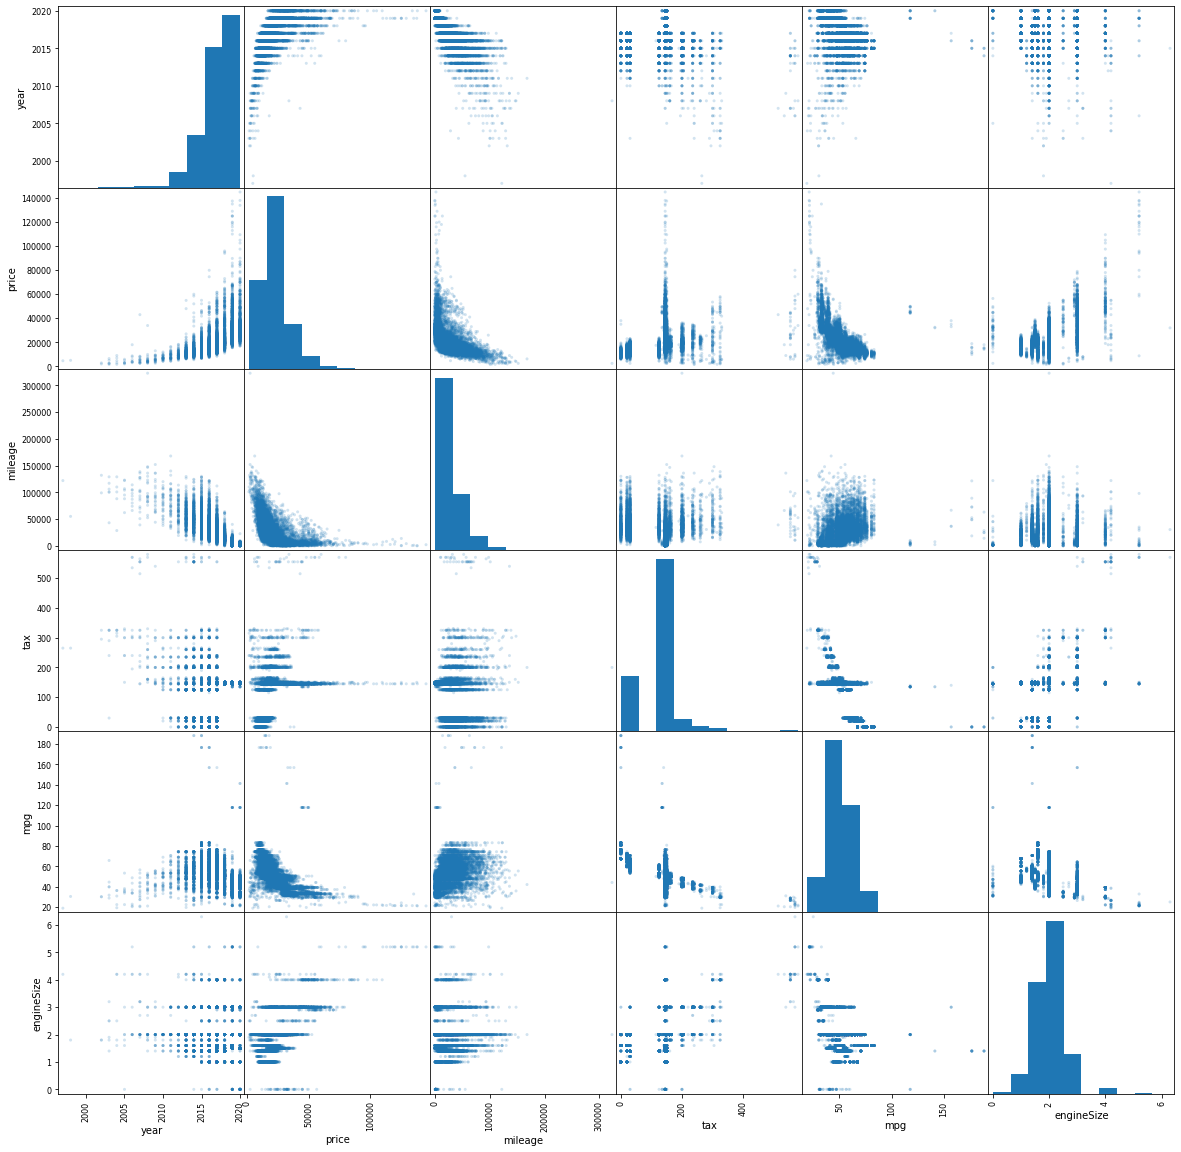

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))